<a href="https://colab.research.google.com/github/saiprasadlaxmeshwar/Apple_Stock_Price_Prediction/blob/master/Recurrent_neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pip install keras

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
pip install pandas_datareader

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/109.5 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 102.4/109.5 kB 2.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2024-07-02 21:24:22.737457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024/07/02 21:24:30 WARNING mlflow.tracking.fluent: Exception raised while enabling autologging for tensorflow: cannot import name 'cast' from partially initialized module 'keras.src.backend' (most likely due to a circular import) (/databricks/python/lib/python3.11/site-packages/keras/src/backend/__init__.py)


In [0]:
# Install yfinance
%pip install yfinance

import yfinance as yf

# Get stocks
df = yf.download('AAPL', start='2012-01-01', end='2024-07-01')

# Display the dataframe
display(df)


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


[*********************100%%**********************]  1 of 1 completed


Open,High,Low,Close,Adj Close,Volume
14.621429443359375,14.73214340209961,14.60714340209961,14.686785697937012,12.41698169708252,302220800
14.64285659790039,14.8100004196167,14.617142677307129,14.765713691711426,12.483712196350098,260022000
14.819643020629883,14.948213577270508,14.738213539123535,14.929642677307129,12.622304916381836,271269600
14.991786003112793,15.098214149475098,14.972143173217773,15.085714340209961,12.754260063171387,318292800
15.196429252624512,15.276785850524902,15.048213958740234,15.061785697937012,12.734029769897461,394024400
15.211071014404297,15.214285850524902,15.053570747375488,15.115714073181152,12.779621124267578,258196400
15.09571361541748,15.101785659790039,14.975357055664062,15.091071128845215,12.7587890625,215084800
15.081428527832031,15.103570938110352,14.95535659790039,15.049642562866211,12.723762512207031,212587200
14.989286422729492,15.016071319580078,14.952142715454102,14.993213653564453,12.676053047180176,226021600
15.149999618530273,15.213929176330566,15.105713844299316,15.16785717010498,12.823705673217773,242897200


In [0]:
df.shape


(3142, 6)

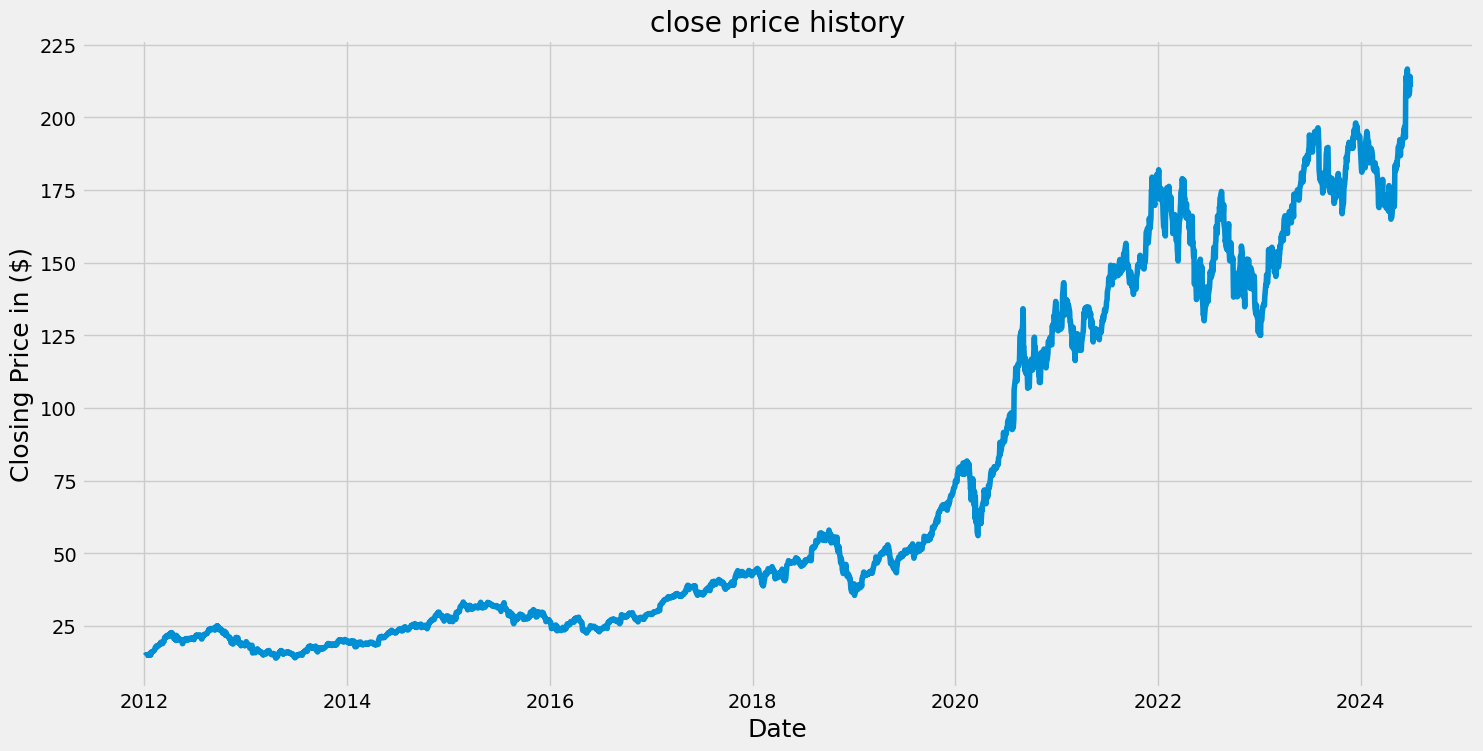

In [0]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.show()


In [0]:
#Create a new dataframe with only closing price column.
data = df.filter(['Close'])

#Convert the dataframe into numpy array
dataset = data.values

In [0]:
#Get the rows to train the lstm model.
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2514

In [0]:
#scale  the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data


array([[0.00364679],
       [0.00403613],
       [0.00484476],
       ...,
       [0.98312966],
       [0.98732261],
       [0.97015623]])

In [0]:
#create the training dataset
#create scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train
x_train = []
y_train= []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60 :
    print(x_train)
    print(y_train)
    print()


[array([0.00364679, 0.00403613, 0.00484476, 0.00561464, 0.0054966 ,
       0.00576263, 0.00564107, 0.0054367 , 0.00515835, 0.00601984,
       0.00679677, 0.00655717, 0.00524467, 0.00649727, 0.00526406,
       0.0098886 , 0.00953098, 0.00999783, 0.0110073 , 0.01161862,
       0.01156753, 0.01137903, 0.01218238, 0.01293816, 0.01379437,
       0.01517733, 0.01808242, 0.01812647, 0.01974374, 0.02095228,
       0.01887521, 0.01967503, 0.01965918, 0.02190186, 0.02158299,
       0.02217316, 0.02323373, 0.02382391, 0.02552398, 0.02676248,
       0.02712011, 0.0272452 , 0.0251276 , 0.02461669, 0.02469245,
       0.02668321, 0.02724344, 0.0284467 , 0.03128309, 0.03506729,
       0.03435907, 0.03436083, 0.03709681, 0.03795301, 0.03734344,
       0.03678674, 0.03620713, 0.0381327 , 0.03945401, 0.04000719])]
[0.03864008132174998]



In [0]:
#convert X and Y Train into numpy arrays.
x_train,y_train = np.array(x_train),np.array(y_train)


In [0]:
#Reshape the data as the lstm model expects data to be 3 dimensional.
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2454, 60, 1)

In [0]:
#Build the lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

/databricks/python/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [0]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
model.fit(x_train,y_train, batch_size=1,epochs=1)

 435/2454 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - loss: 0.0029

*** WARNING: max output size exceeded, skipping output. ***

2454/2454 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - loss: 0.0013


In [0]:
#create Testing dataset
#create a new array containing scaled values from index 1677 till 2171
test_data= scaled_data[training_data_len-60: , :] 
#Lets create x_test and y_test dataset
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])




In [0]:
#CConvert a numpy array of x_test
x_test= np.array(x_test)
x_test.shape

(628, 60)

In [0]:
#lets reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(628, 60, 1)

In [0]:
#Get models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [0]:
#now lets evaluate the model with RMSE metric
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse


13.356034236349117

/root/.ipykernel/5752/command-3159958812303164-3592362202:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


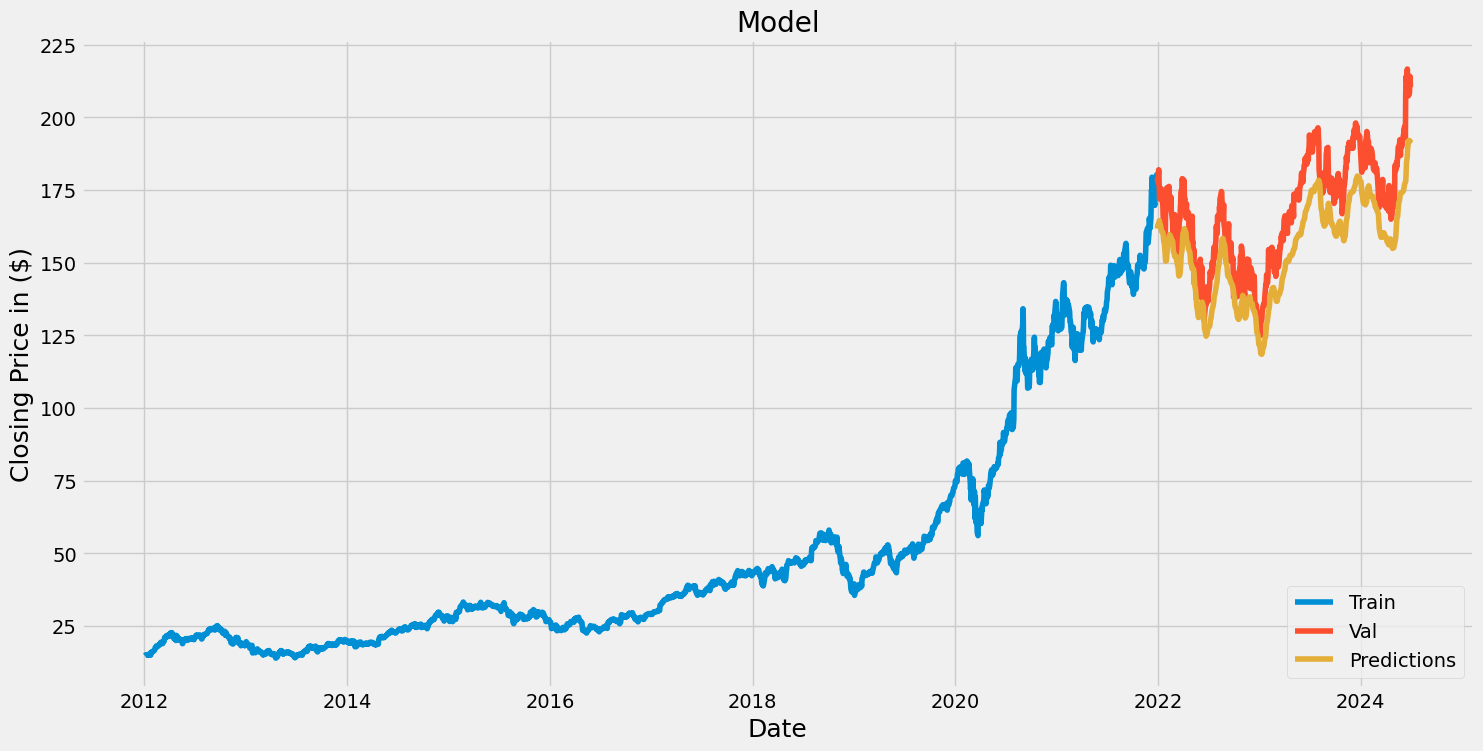

In [0]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the Plot
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show()


In [0]:
valid

,Close,Predictions
Date,,
2021-12-29,179.380005,161.723175
2021-12-30,178.199997,162.514282
2021-12-31,177.570007,163.075821
2022-01-03,182.009995,163.405563
2022-01-04,179.699997,164.042664
...,...,...
2024-06-24,208.139999,192.098511
2024-06-25,209.070007,191.961456
2024-06-26,213.250000,191.764816


In [0]:
#Get the Quote
apple_quote = yf.download('AAPL', start='2012-01-01', end='2024-07-01')
#create new data frame
new_df= apple_quote.filter(['Close'])
#Get last 60 days closing price
last_60_days= new_df[-60:].values
#scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the last 60 days prices to X_test
X_test.append(last_60_days_scaled)
#lets convert X_test to a Numpy array
X_test = np.array(X_test)
#Reshape the data to 3 dimentional
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price= model.predict(X_test)
#inverse Transform the Scaled data 
pred_price= scaler.inverse_transform(pred_price)


[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [0]:
#Apple Closing Stock Price Predictions
print(pred_price)



[[192.55392]]
